
# Андан на экономе: домашнее задание 1



**ФИО:** Нуруллин Ринат Ильдарович

**Факт о себе:** не уважаю анаконду. топ джи питонят в idle

**Бонус (1 балл):**  Прикрепите фотографию того, как вы начали этот февраль. Какую самую классную эмоцию вы испытали за прошедший месяц?

топ джи не испытывает эмоций.

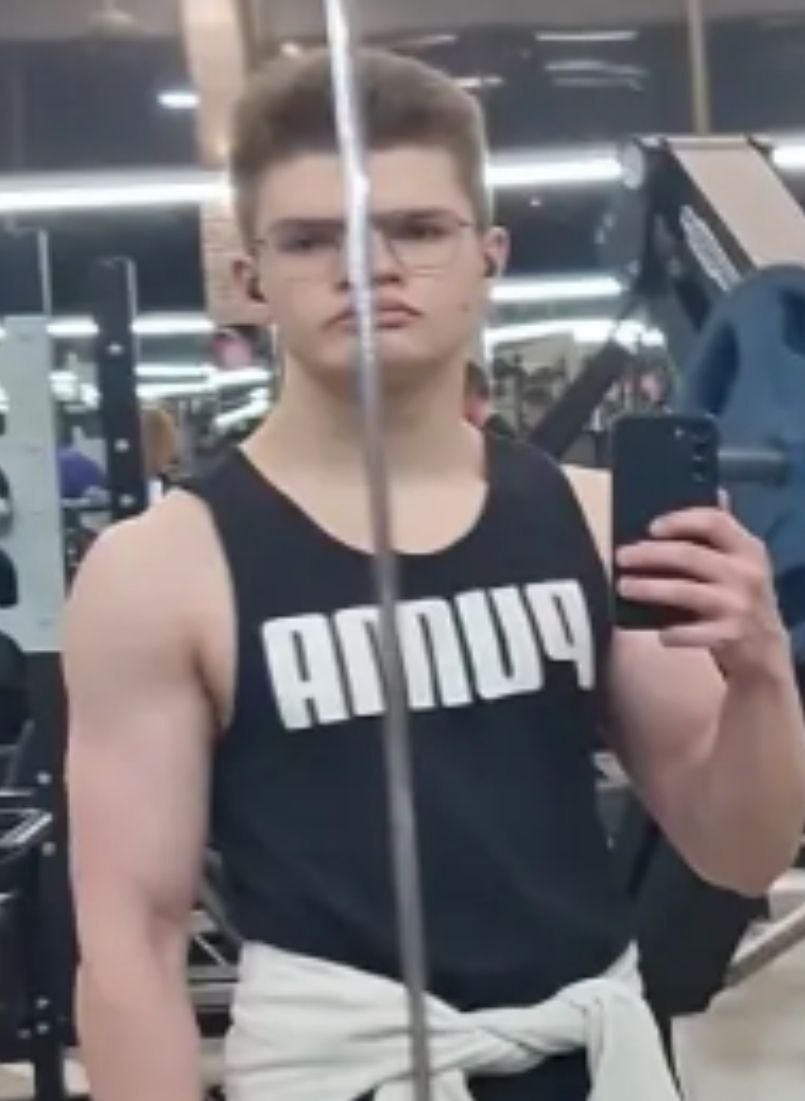

In [240]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1: скучная разминка (25 баллов)

__[5 баллов]__ Создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5. 

- Найдите её след с помощью библиотечных функций. 
- Найдите обратную к ней матрицу.

In [241]:
matrix = np.diag([1, 2, 3, 4, 5])

print("След:", np.trace(matrix))
print("\nОбратная матрица:\n", np.linalg.inv(matrix))



След: 15

Обратная матрица:
 [[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.        ]
 [-0.         -0.         -0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


__[5 баллов]__ сгенерируйте случайную матрицу $X$ размера $4\times5$

- Найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$.
- Найдите произведение $X^TX$, его определитель и след.

In [242]:
np.random.seed(42)
matrix = np.random.rand(4, 5)
submatrix = matrix[1:3, 0:2]
XTX = np.dot(matrix.T, matrix)

print('Матрица:\n', matrix)
print('\nПодматрица:\n', submatrix)
print('\nМинор:', np.linalg.det(submatrix))
print('\nXTX:\n', XTX)
print('\nОпределитель XTX:', np.linalg.det(XTX))
print('\nСлед XTX:', np.trace(XTX))

Матрица:
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]]

Подматрица:
 [[0.15599452 0.05808361]
 [0.02058449 0.96990985]]

Минор: 0.15010500037401162

XTX:
 [[0.19867553 0.44090588 0.52265794 0.40158383 0.22604619]
 [0.44090588 1.94051986 1.71327514 0.94143383 0.4544146 ]
 [0.52265794 1.71327514 2.25440631 1.36231192 1.0317035 ]
 [0.40158383 0.94143383 1.36231192 0.95139564 0.68343847]
 [0.22604619 0.4544146  1.0317035  0.68343847 0.64358332]]

Определитель XTX: -1.7359353332522796e-20

След XTX: 5.988580655388464


На паре мы говорили, что использования циклов (и самописных вычислений в целом) в python лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В следующих трёх заданиях нельзя пользоваться циклами вообще, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, напишите собственные тесты со случайными матрицами.

**[5 баллов]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [243]:
def prod_and_sq_sum(A):
    return np.prod(np.diag(A)**2), np.sum(np.diag(A)**2)

**[5 баллов]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k, n)}a_ib_i^T$$

In [244]:
m, n, k = 40, 40, 40
np.random.seed(42)
A = np.random.rand(m, n)
np.random.seed(24)
B = np.random.rand(m, n)

def f(matrixA, matrixB, k):
    N = min(matrixA.shape[0], matrixB.shape[0], k)
    return np.sum(np.sum(matrixA[:N] * matrixB[:N], axis=1))


f(A, B, k)


396.9013669279497

**[5 баллов]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [245]:
def get_diag(A,B):
    x = []
    for _ in range(A.shape[0]):
        x.append(np.dot(A[_, :], B[:, _]))
    return x

## Задача 2: про удачу и нашу жизнь (25 баллов)

Задача была вдохновлена [вот этим видео.](https://www.youtube.com/watch?v=3LopI4YeC4I)

Люди часто недооценивают роль случайности в своей жизни. Им кажется, что если они прокачают свои навыки и отдадутся полностью работе, они обязательно достигнут успеха. Люди забывают, что удача тоже важна. Иногда слишком.

Пусть у нас в выборке есть $10000$ кандидатов в космонавты. Из них только $10$ человек пройдут все испытания и приступят к тренировкам. Отбор в космонавты на $95\%$ зависит от навыков кандидата и на $5\%$ от его удачливости. Навыки и удачливость не зависят друг от друга.

__а) [5 баллов]__  Сгенерируйте навык каждого кандидата из равномерного распределения на отрезке $[0; 1]$. По аналогии сгенирируйте удачливость каждого кандидата. Итоговую величину, по которой будет производиться отбор в космонавты, рассчитайте по формуле: 

$$
\text{score} = 0.95 \cdot \text{skill} + 0.05 \cdot \text{luck}.
$$

Повторите эту симуляцию $10^4$ раз. Оцените среднее значение удачливости тех, кто стал космонавтом. Постройте гистограмму для распределения удачи среди тех, кто стал космонавтом.

**Hint:** обратите внимание на функцию `np.argpartition`. Она поможет вам сделать код проще. Также обратите внимание, что в пунктах б) и в) нужно переиспользовать результаты симуляций из пункта а). Иначе код будет работать слишком долго.

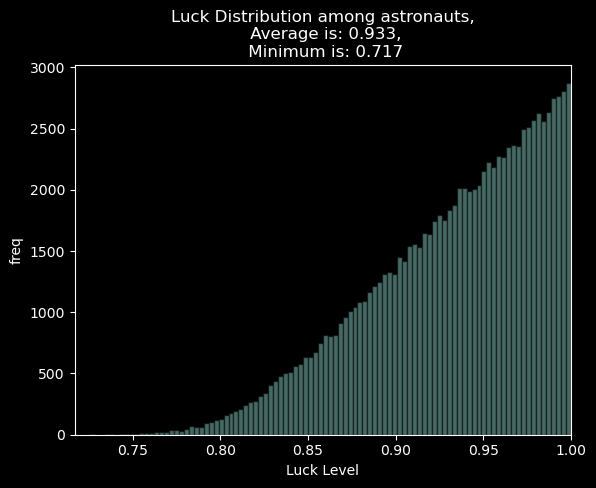

In [246]:
candidates = 10**4
sim = 10**4
win = 10

np.random.seed(42)
luck = stats.uniform(0, 1).rvs(size = (sim, candidates))
np.random.seed(24)
skill = stats.uniform(0, 1).rvs(size = (sim, candidates))
score = 0.95 * skill + 0.05 * luck

astro = np.argpartition(score, -win, axis=1)[:, -win:]
lucks = luck[np.arange(sim)[:, None], astro]
mean = np.mean(lucks)

plt.style.use('dark_background')    
plt.hist(lucks.flatten(), bins = 100, alpha = 0.5, edgecolor='black')
plt.xlim(np.min(lucks), 1)
plt.xlabel('Luck Level')
plt.ylabel('freq')
plt.title(f'Luck Distribution among astronauts,\n Average is: {mean:.3f},\n Minimum is: {np.min(lucks):.3f}')
plt.show()


АНАЛИЗ: По полученной гистограмме можно сделать вывод о том, что даже с супер-уровнем скилла, все равно абсолютно необходимо иметь высокий уровень удачи, чтобы иметь шанс достичь результата.
В конкретной выборке минимально необходимый уровень удачи после 10000 экспериментов по 10000 человек составил 0.717, что при сравнении с медианой удачи в 0.5 больше почти в полтора раза.
Средняя удача готового астронавта составила аж 0.933, что в 1.86 раза больше медианы удачи.

ВЫВОД: даже всю жизнь уделив одному делу и выкачав скилл до твердой единицы, порой недостаточно чтобы добиться желаемого результата. Решение? крутите слоты по моей реферальной ссылке- 10 фриспинов и 2000 рублей на счет 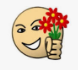

__б) [5 баллов]__  Отберите космонавтов по навыкам, `skill`. Оцените с помощью симуляций, на сколько в среднем человек топ кандидатов по `skill` пересекается с топом по `score`.

In [247]:
top_skill = np.argpartition(skill, -win, axis=1)[:, -win:]
top_score = np.argpartition(score, -win, axis=1)[:, -win:]

intersections = []
for i in range(sim):
    intersection = np.intersect1d(top_skill[i], top_score[i]).shape[0]
    intersections.append(intersection)
mean_intersection = np.mean(intersections)

print(f"Среднее количество пересечений: {mean_intersection}")

Среднее количество пересечений: 1.8362


__в) [5 баллов]__ А что будет, если мы будем отбирать больше космонавтов? 

Для каждого $n$ от $10$ до $500$ с шагом в $10$ сделайте процедуру отбора в космонавты топ-$n$ кандидатов по `skill` и по `score`. Посчитайте, на сколько в среднем процентов отличаются эти топы. Изобразите получившуюсья зависимость на графике. По оси абсцисс отложите $n$, по оси ординат процент пересечения.

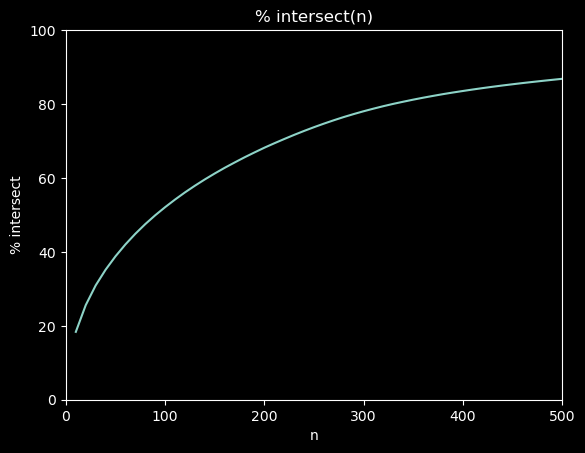

In [248]:
intersection_percentages = []

for n in range(10, 501, 10):
    top_skill = np.argpartition(skill, -n, axis=1)[:, -n:]
    top_score = np.argpartition(score, -n, axis=1)[:, -n:]

    intersections = []
    for _ in range(sim):
        intersection = np.intersect1d(top_skill[_], top_score[_]).shape[0]
        intersections.append(intersection)
    mean_intersection = np.mean(intersections)
    intersection_percentage = (mean_intersection / n) * 100
    intersection_percentages.append(intersection_percentage)

plt.style.use('dark_background')    
plt.plot(range(10, 501, 10), intersection_percentages)
plt.xlabel('n')
plt.xlim(0, 500)
plt.ylim(0, 100)
plt.ylabel('% intersect')
plt.title('% intersect(n)')
plt.show()


__г) [5 баллов]__ Сделайте выводы из проделанных рассчётов.

__Ответ:__ все весьма печально для невезунчиков... Видим, что чем выше порог прохода в астронавты, тем более весомую роль играет удача. Так, например всего около 20 процентов людей, имеющие топовые -> 1 значения скилла смогут пройти планку при небольшой выборке -> 0.

С другой стороны, если порог входа ниже, то удача играет все менее весомую роль. При выборке 500 астронавтов из 10000 кандидатов, по результатам 10000 симуляций пересечение астронавтов с топами по скиллу составило около 80 процентов, что куда более приятно)

Вывод: возможно стоит воздержаться крайностей. Не надо быть чрезчур амбициозным в жизни, не стоить метить в топ-1, ибо шанс попадания туда крайне невелик, даже с идеальным уровнем скилла. Верно и обратное, занижать планочку и становиться стадом тоже не стоит. Такая вот мораль.


> Повод ли это грустить? Конечно же, нет. Если вы попытались схватиться за одну из возможностей и у вас ничего не вышло, забудьте об этом. Не впадайте в депрессию, продолжайте пытаться. В мире есть столько возможностей, которые можно упустить. Обидно будет, если вы не попробуете ещё. Рано или поздно удача вам улыбнётся ❤️❤️❤️

Давайте попробуем понять, когда именно она вам улыбнётся. 

__д) [4 балла]__ Юра хочет стать космонавтом. У него довольно хорошо развиты навыки. Юра входит в $1\%$ лучших, его `score = 0.99` (Юра прокачал свои навыки до 0.99 и вообще не полагается на удачу). С какой вероятностью Юра станет космонавтом?

In [249]:
winscore = np.take_along_axis(score, astro, axis = 1)
lowscore = np.min(winscore, axis = 1)
yura_chance = np.mean(lowscore < 0.99)
yura_chance

0.393

__е) [1 балл]__ Юра пытается снова и снова. Сколько в среднем попыток ему надо сделать до первого успеха? 

__Hint:__ тут не нужно ничего симулировать. Надо вспомнить про геометрическое распределение и его математическое ожидание.

In [250]:
print(1/yura_chance)

2.544529262086514


## Задача 3: парадокс лифта (20 баллов)

[Райан Гослинг](https://www.youtube.com/watch?v=2jT71iFvpSM), [Стив Роджерс](https://www.youtube.com/watch?v=hLUdF8cjzyA) и [группа Radiohead](https://www.youtube.com/watch?v=QBGaO89cBMI) катаются на лифте. 

В здании 30 этажей и лобби (нулевой этаж). Лифт только один и работает очень медленно. Он останавливается на каждом этаже по пути наверх, а затем на каждом этаже по пути вниз. Перемещение между этажами и ожидание пассажиров занимает минуту. Если лифт стартует с нулевого этажа в 8 утра, он в 08:30 доезжает до 30 и к 9 утра возвращается на первый этаж.

Проведите $10^4$ экспериментов и с их помощью ответьте на следующие вопросы: 

__а) [5 баллов]__   Райан Гослинг в случайное время подходит к лифту на 3 этаже и ждёт его. Оцените вероятность того, что лифт приедет к Райану сверху. 

In [251]:
simulations, start, up, end, cnt = (10**4, 0, 30, 60, 0)
floor_ryan = 3
from_below, from_above = (floor_ryan, up + (up - floor_ryan))  
np.random.seed(42)
ryan_time = np.random.uniform(start, end, simulations)

for time in ryan_time:
    if time >= from_below and time < from_above:
        cnt += 1

res_ryan = cnt / simulations
res_ryan


0.9033

__б) [5 баллов]__ Группа Radiohead в случайное время подходит к лифту на 25-ом этаже и ждёт его. Оцените вероятность того, что лифт приедет к группе Radiohead сверху. 

In [252]:
simulations, start, up, end, cnt = (10**4, 0, 30, 60, 0)
floor_radiohead = 25
from_below, from_above = (floor_radiohead, up + (up - floor_radiohead))
np.random.seed(24)
radiohead_time = np.random.uniform(start, end, simulations)

for time in radiohead_time:
    if time >= from_below and time < from_above:
        cnt += 1

res_radiohead = cnt / simulations
res_radiohead


0.1614

__в) [5 баллов]__  Постройте гистограммы времени ожидания лифта для Райана Гослинга и группы Radiohead. Похожи ли визуально распределения на нормальные? Насколько сильно они отличаются друг от друга?

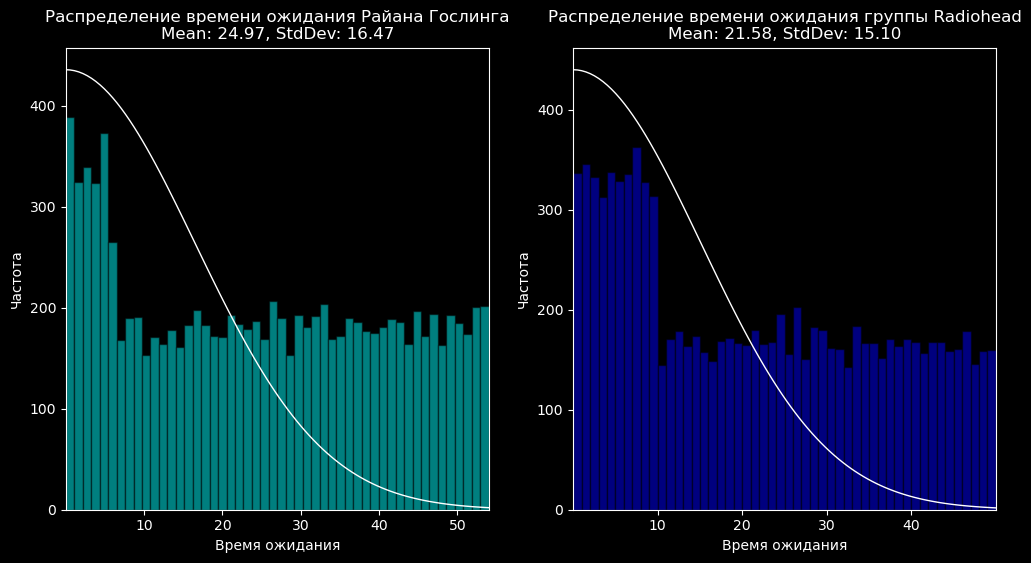

In [253]:
def timefunc(time, floor):
    current = time if time <= 30 else 60 - time
    if time <= 30:
        if current >= floor:
            return (30 - current) + (30 - floor)
        else:
            return floor - current
    else:
        if current >= floor:
            return current - floor
        else:
            return current + floor

rayan_waiting = []
for time in ryan_time:
    rayan_waiting.append(timefunc(time, floor_ryan))

radiohead_waiting = []
for time in radiohead_time:
    radiohead_waiting.append(timefunc(time, floor_radiohead))

def plot_distribution(data, title, color):
    plt.hist(data, bins=50, alpha=0.5, color=color, edgecolor='black')

    xmin = min(data)
    xmax = max(data)
    plt.xlim(xmin, xmax)

    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, 0, np.std(data)) * len(data) * (xmax - xmin) / 30
    plt.plot(x, p, color='white', linewidth=1)

    title = title + "\nMean: {:.2f}, StdDev: {:.2f}".format(np.mean(data), np.std(data))
    plt.title(title)
    plt.xlabel('Время ожидания')
    plt.ylabel('Частота')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_distribution(rayan_waiting, 'Распределение времени ожидания Райана Гослинга', 'cyan')
plt.subplot(1, 2, 2)
plot_distribution(radiohead_waiting, 'Распределение времени ожидания группы Radiohead', 'blue')
plt.show()




получившиеся гистограммы определенно напоминают нормальное распределение, но отсутствует характерный 'спад' по его краям. Хотя, возможно, нужно просто провести эксперимент в Бурдж-Халифе, мб поможет другая сотня этажей...

Идейно распределения похожи друг на друга, но Radiohead ждет в среднем на 3 минуты меньше, чем Госля.


г) [5 баллов] У Стива Роджерса куча свободного времени и он катается на лифте весь день. Нарисуйте для Стива два графика:

В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат отложите оценку вероятности того, что лифт придёт сверху.
В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат среднее время ожидания лифта.

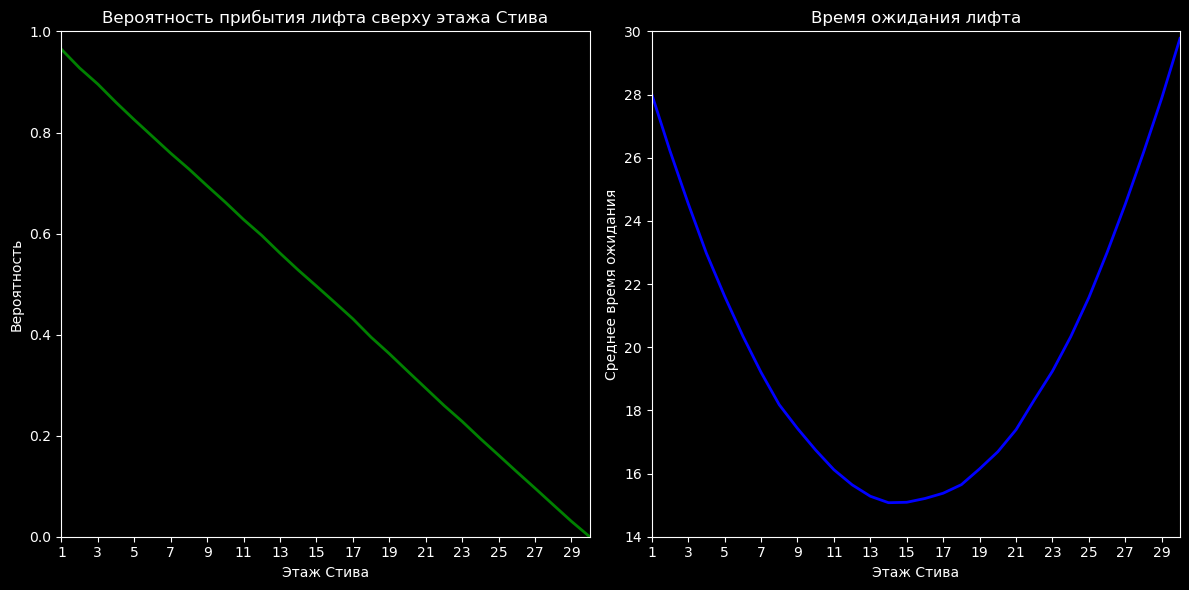

In [254]:
def p(floor_steve):
    cnt = 0
    from_below, from_above = (floor_steve, up + (up - floor_steve))
    np.random.seed(24)
    steve_time = np.random.uniform(start, end, simulations)
    for time in steve_time:
        if time >= from_below and time < from_above:
            cnt += 1
    res_steve = cnt / simulations
    return res_steve

def t(floor):
    np.random.seed(24)
    steve_time = np.random.uniform(start, end, simulations)
    wait_times = []
    for time in steve_time:
        current = time if time <= 30 else 60 - time
        if time <= 30:
            if current >= floor:
                wait_times.append((30 - current) + (30 - floor))
            else:
                wait_times.append(floor - current)
        else:
            if current >= floor:
                wait_times.append(current - floor)
            else:
                wait_times.append(current + floor)
    return np.mean(wait_times)
    
floors = list(range(1, 31))
probabilities = [p(floor) for floor in floors]
times = [t(floor) for floor in floors]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(floors, probabilities, color='green', linewidth=2, markersize=6)
plt.title('Вероятность прибытия лифта сверху этажа Стива')
plt.xlabel('Этаж Стива')
plt.ylabel('Вероятность')
plt.xlim(1, 30)
plt.ylim(0, 1)
plt.xticks(range(1, 31, 2))  

plt.subplot(1, 2, 2)
plt.plot(floors, times, color='blue', linewidth=2, markersize=6)
plt.title('Время ожидания лифта')
plt.xlabel('Этаж Стива')
plt.xlim(1, 30)
plt.ylim(14, 30)
plt.ylabel('Среднее время ожидания')
plt.xticks(range(1, 31, 2))  

plt.tight_layout()
plt.show()


вообще, достаточно логичные результаты. Действительно, чем выше стоит Стив, тем меньше вероятность прихода лифта сверху. 
Аналогично, время ожидания лифта в среднем должно быть максимальным в самом верху и в самом низу, просто потому что большую часть своего пути лифт проходит между этими точками.


Как думаете, будет ли наблюдаться что-то похожее в реальной жизни? Попробуйте понаблюдать за лифтом у себя дома и в офисе. На каком этаже вы живёте/работаете? Выполняется ли для вас [парадокс лифта?](https://en.wikipedia.org/wiki/Elevator_paradox) 

в настоящий момент живу в двухэтажном доме. эксперимент провален :(

## Задача 4: паровозики (30 баллов)

От станции Ромашково друг за другом в одном направлении отходит $100$ паровозиков с интервалом в одну минуту. Стартовые скорости паровозиков -- независимые, равномерные на отрезке $[0;1]$ случайные величины. Когда более быстрый паровозик догоняет более медленный, он снижает свою скорость до скорости догнанного паровозика.

Через достаточно длинный интервал времени паровозики разобьются на несколько групп и далее число групп меняться не будет. Назовём это число групп финальным. Проведите $1000$ симуляций и найдите ответы на следующие вопросы:

__а) [5 баллов]__  Какова вероятность того, что пятый паровозик -- лидер очередной группы?

In [255]:
np.random.seed(42)
train_speeds = np.random.uniform(0, 1, size=(1000, 100))
train_speeds = np.minimum.accumulate(train_speeds, axis=1)

cnt = np.sum(train_speeds[:, 3] > train_speeds[:, 4])
cnt / 1000

0.211

__б) [5 баллов]__ На сколько финальных групп в среднем разбиваются паровозики?

In [256]:
mean_mas = np.mean([len(np.unique(train_speeds[_])) for _ in range(1000)])
mean_mas

5.19

__в) [10 баллов]__ Нарисуйте усреднённое по симуляциям количество групп в зависимости от времени от старта. По горизонатльной оси — время, прошедшее от старта. По вертикальной оси — среднее число групп. 

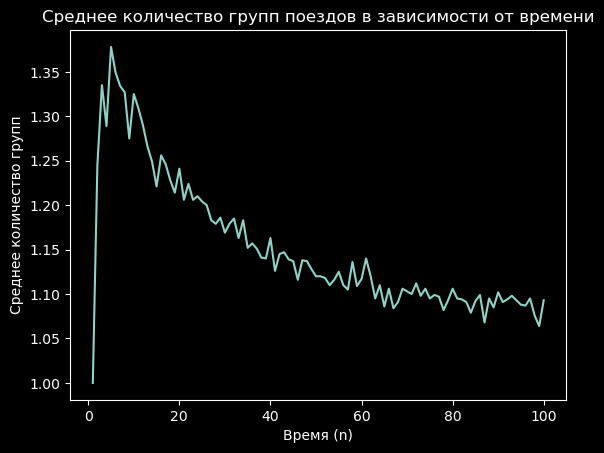

In [280]:


def simulate_trains(n, num_simulations=1000):
    train_counts = []
    for _ in range(num_simulations):
        trains = []
        for t in range(n):
            speed = np.random.uniform(0, 1)
            trains.append({'speed': speed, 'position': 0})
            for train in trains:
                train['position'] += train['speed']
            i = 0
            while i < len(trains) - 1:
                if trains[i]['position'] >= trains[i + 1]['position']:
                    trains[i]['speed'] = min(trains[i]['speed'], trains[i + 1]['speed'])
                    del trains[i + 1]
                else:
                    i += 1
        train_counts.append(len(trains))
    return np.mean(train_counts)

max_n = 100
group = [simulate_trains(n) for n in range(1, max_n + 1)]

plt.plot(range(1, max_n + 1), group)
plt.xlabel('Время (n)')
plt.ylabel('Среднее количество групп')
plt.title('Среднее количество групп поездов в зависимости от времени')
plt.show()


__г) [10 баллов]__  Оцените среднее время, в течение которого паровозики разбиваются на финальное число групп. Оцените для этой же случайной величины дисперсию.